<a href="https://colab.research.google.com/github/COMP90054/COMP90054_Tutorials/blob/main/tutorials/problem_set_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP90054 AI Planning for Autonomy
### Problem Set 01 - Blind Search




### Key concepts:
- State-space model
- Blind search algorithms: BFS, DFS and ID


### Prerequisite:
- Please run the following blocks of code to initialise the *environment*

In [49]:

!pip install pydotplus

In [50]:
import numpy as np
import pydotplus
from IPython.display import display, Image


In [51]:
#def of the problem

class Problem():
  initial_state = None
  state_space = None
  goal_states = None
  actions = None
  transition_function = None
  costs = None

  def __init__(self, initial_state, state_space, goal_states, actions, transition_function, costs):
    self.initial_state = initial_state
    self.state_space = state_space
    self.goal_states = goal_states
    self.actions = actions
    self.transition_function = transition_function
    self.costs = costs

    self.current_state = self.initial_state
    
    return 
  
def generate_state_graph(problem):
  state_graph={}
  state_graph['nodes'] = {k:{'label':'\"{}\n{}\"'.format(k,' ')} for k in sorted(list(problem.state_space))}
  state_graph['edge'] = {k:{'label':str(prob.costs[k])} for k in problem.costs.keys()}
  return state_graph

def render_graph(param):
  s = ''
  s += 'digraph G { \n'

  for node,tdict in param['nodes'].items():
    tstr = node + ' '
    if bool(tdict):
      tstr += '['
      for k,v in tdict.items():
        tstr += '{}={},'.format(k,v)
      tstr = tstr[:-1] + ']'
    tstr += ';\n'
    s+=tstr
  
  for edge,tdict in param['edge'].items():
    tstr = edge[0] + '->' + edge[1] + ' '
    if bool(tdict):
      tstr += '['
      for k,v in tdict.items():
        tstr += '{}={},'.format(k,v)
      tstr = tstr[:-1] + ']'
    tstr += ';\n'
    s+=tstr
  s += ' \n}'

  #print (s)
  graph = pydotplus.graph_from_dot_data(s)
  return graph.create_png()






---


### Example:


#### State transition graph:


![Image1](http://115.146.95.253/tutorial/problem01_1.png)

#### Code to auto generate state space model (you don't have to use it)

In [52]:
# Code to auto generate state space model

states = set(['s{}'.format(i) for i in range(1,8)])
ini_st = 's1'
goal_sts = set(['s7'])

costs = {
    ('s1','s2'):2,
    ('s1','s3'):2,
    ('s1','s4'):1,
    ('s2','s5'):2,
    ('s3','s7'):10,
    ('s4','s6'):1,
    ('s5','s7'):3,
    ('s6','s7'):4,
}

actions = {'s{}'.format(i): set() for i in range(1,8)}
for k1,k2 in costs.keys():
  actions[k1].add((k1,k2))

tranf = {(k[0],k):k[1] for k in costs.keys()}

# the following sequence could be replace by student's input () and the solution could be generated by search algorithms
ns = [
      ('s1',0,None),
      ('s2',2,1),
      ('s3',2,1),
      ('s4',2,1),
      ('s5',4,2),
      ('s7',12,3),
      ('s6',2,4),
      ('s7',7,5),
]

prob = Problem(initial_state=ini_st, state_space=states, goal_states=goal_sts, actions=actions, transition_function=tranf, costs=costs)

print ('initial_state={}'.format(prob.initial_state))
print ('state_space={}'.format(prob.state_space))
print ('goal_states={}'.format(prob.goal_states))
print ('actions={}'.format(prob.actions))
print ('transition_function={}'.format(prob.transition_function))
print ('costs={}'.format(prob.costs))


initial_state=s1
state_space={'s3', 's5', 's1', 's2', 's4', 's7', 's6'}
goal_states={'s7'}
actions={'s1': {('s1', 's3'), ('s1', 's2'), ('s1', 's4')}, 's2': {('s2', 's5')}, 's3': {('s3', 's7')}, 's4': {('s4', 's6')}, 's5': {('s5', 's7')}, 's6': {('s6', 's7')}, 's7': set()}
transition_function={('s1', ('s1', 's2')): 's2', ('s1', ('s1', 's3')): 's3', ('s1', ('s1', 's4')): 's4', ('s2', ('s2', 's5')): 's5', ('s3', ('s3', 's7')): 's7', ('s4', ('s4', 's6')): 's6', ('s5', ('s5', 's7')): 's7', ('s6', ('s6', 's7')): 's7'}
costs={('s1', 's2'): 2, ('s1', 's3'): 2, ('s1', 's4'): 1, ('s2', 's5'): 2, ('s3', 's7'): 10, ('s4', 's6'): 1, ('s5', 's7'): 3, ('s6', 's7'): 4}


#### Code to generate problem

In [56]:
initial_state = 's1'
state_space = {'s3', 's5', 's1', 's2', 's4', 's7', 's6'}
goal_states = {'s7'}
actions = {'s1': {('s1', 's3'), ('s1', 's2'), ('s1', 's4')}, 's2': {('s2', 's5')}, 's3': {('s3', 's7')}, 's4': {('s4', 's6')}, 's5': {('s5', 's7')}, 's6': {('s6', 's7')}, 's7': set()}
transition_function = {('s1', ('s1', 's2')): 's2', ('s1', ('s1', 's3')): 's3', ('s1', ('s1', 's4')): 's4', ('s2', ('s2', 's5')): 's5', ('s3', ('s3', 's7')): 's7', ('s4', ('s4', 's6')): 's6', ('s5', ('s5', 's7')): 's7', ('s6', ('s6', 's7')): 's7'}
costs = {('s1', 's2'): 2, ('s1', 's3'): 2, ('s1', 's4'): 1, ('s2', 's5'): 2, ('s3', 's7'): 10, ('s4', 's6'): 1, ('s5', 's7'): 3, ('s6', 's7'): 4}

problem = Problem(initial_state, state_space, goal_states, actions, transition_function, costs)

#### Generate your state-space graph:

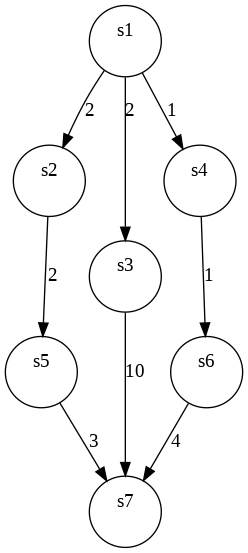

In [55]:
display(Image(render_graph(generate_state_graph(problem))))

---


### Problem 1:


From the above example, define the state-space model of the following graph:

![Image2](http://115.146.95.253/tutorial/problem01_2.png)

#### Please input your code here:

In [ ]:
initial_state = ''
state_space = {}
goal_states = {}
actions = {}
transition_function = {}
costs = {}

problem = Problem(initial_state, state_space, goal_states, actions, transition_function, costs)

#### Please try your state space discription:

In [ ]:
display(Image(render_graph(generate_state_graph(problem))))

### Problem 2

From the given example above solve the problem with three common blind search algorithms: BFS, DFS and ID.

#### BFS:


In [65]:

ns = [
      ('s1',0,None),
      ('s2',2,1),
      ('s3',2,1),
      ('s4',2,1),
      ('s5',4,2),
      ('s7',12,3),
      ('s6',2,4),
      ('s7',7,5),
]

initial_state = 's1'
state_space = {'s3', 's5', 's1', 's2', 's4', 's7', 's6'}
goal_states = {'s7'}
actions = {'s1': {('s1', 's3'), ('s1', 's2'), ('s1', 's4')}, 's2': {('s2', 's5')}, 's3': {('s3', 's7')}, 's4': {('s4', 's6')}, 's5': {('s5', 's7')}, 's6': {('s6', 's7')}, 's7': set()}
transition_function = {('s1', ('s1', 's2')): 's2', ('s1', ('s1', 's3')): 's3', ('s1', ('s1', 's4')): 's4', ('s2', ('s2', 's5')): 's5', ('s3', ('s3', 's7')): 's7', ('s4', ('s4', 's6')): 's6', ('s5', ('s5', 's7')): 's7', ('s6', ('s6', 's7')): 's7'}
costs = {('s1', 's2'): 2, ('s1', 's3'): 2, ('s1', 's4'): 1, ('s2', 's5'): 2, ('s3', 's7'): 10, ('s4', 's6'): 1, ('s5', 's7'): 3, ('s6', 's7'): 4}

problem = Problem(initial_state, state_space, goal_states, actions, transition_function, costs)
progress = []
visited = {}
parents = {}
state_graph = {}

for i,(state,value,parent) in enumerate(ns):
  param['nodes'] = {k:{'label':'\"n{}\n{},{},n{}\"'.format(k+1,state,cost,parent)} for k,(state,cost,parent) in enumerate(ns)}
  for 
  if state not in visited:
    visited[node] = value
    if parent is not None:
      parents[node] = ns[parent-1][0]

  param = {}
  for k,v in visited.items():
    param['nodes'][k]['color'] = 'green'
    param['nodes'][k]['label'] = '\"{}\n{}\"'.format(k,v)
  param['nodes'][len()]['color'] = 'red'

  param['edge'] = {k:{'label':str(prob.costs[k])} for k in prob.costs.keys()}
  for n1,n2 in parents.items():
    param['edge'][(n2,n1)]['color'] = 'green'


  progress.append(param)


KeyError: ignored

In [ ]:

# generating expansion order based on the ns
progress = []
visited = {}
parents = {}
state_graph = {}





In [ ]:
state_graph

{'edge': {('s1', 's2'): {'label': '2'},
  ('s1', 's3'): {'label': '2'},
  ('s1', 's4'): {'label': '1'},
  ('s2', 's5'): {'label': '2'},
  ('s3', 's7'): {'label': '10'},
  ('s4', 's6'): {'label': '1'},
  ('s5', 's7'): {'label': '3'},
  ('s6', 's7'): {'label': '4'}},
 'nodes': {'s1': {'label': '"s1\n "'},
  's2': {'label': '"s2\n "'},
  's3': {'label': '"s3\n "'},
  's4': {'label': '"s4\n "'},
  's5': {'label': '"s5\n "'},
  's6': {'label': '"s6\n "'},
  's7': {'label': '"s7\n "'}}}

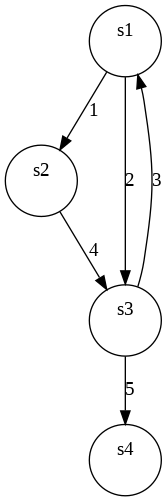

In [60]:


display(Image(render_graph(generate_state_graph(prob))))

In [ ]:
prog_imgs = [render_graph(param) for param in progress]

from ipywidgets import interact
def show_img(idx):
  return display(Image(prog_imgs[idx]))
interact(show_img,idx=(0,len(prog_imgs)-1,1))

interactive(children=(IntSlider(value=3, description='idx', max=7), Output()), _dom_classes=('widget-interact'…

<function __main__.show_img>